특정 호선을 입력하세요 : 안산선


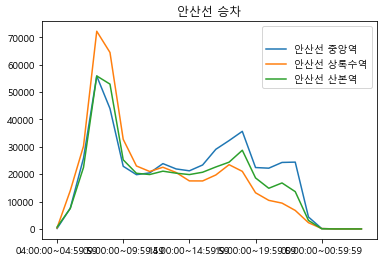

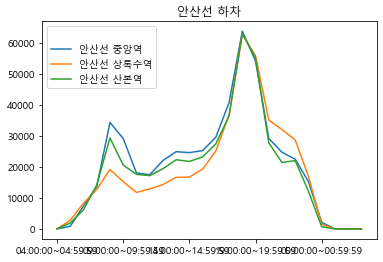

In [4]:
#1번
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv


df = pd.read_csv('C:\\Users\\Song\\Desktop\\subway_time.csv', encoding='UTF-8', index_col=0) #파일 불러오기. C:\\Users\\Song\\Desktop\\subway_time.csv는 제가 불러온 파일의 경로입니다.
for i in range(1,len(df.index)): #역에 '역'이라는 문자 추가
    df.iloc[i,0]=df.iloc[i,0]+'역'
for i in range(2,48,2):
    df=df.rename(columns={df.columns[i]:df.columns[i-1]}) #하차 부분도 시간입력
name = input("특정 호선을 입력하세요 : ") #사용자로부터 데이터 입력받음
a=df.index.str.match(name,na=False ) #nan 값도 False로 처리
#a=df.index.str.contains(name,na=False ) #nan 값도 False로 처리
df2 = df[a]
df2=df2.rename(columns={'지하철역':' '}) #문제 예시와 같게 하기 위해서 '지하철역'이 안보이게 공백처리
df2=df2.set_index(' ') # '지하철역'부분에 index 부여
df2=df2.apply(pd.to_numeric) #엑셀 내 숫자들이 object 형식으로 구현되어 이를 숫자로 바꿨다.
df2=df2.rename(index=lambda x : name+' '+str(x)) #역이름에 호선명 추가

on=df2.iloc[::,::2] #승차
off=df2.iloc[::,1::2]
mor_on=df2.iloc[::,6:12:2].sum(axis=1) #출근 승차인원
mor_off=df2.iloc[::,7:12:2].sum(axis=1) #출근 하차인원
eve_on=df2.iloc[::,26:32:2].sum(axis=1) #퇴근 승차인원
eve_off=df2.iloc[::,27:32:2].sum(axis=1) #퇴근 하차인원
pop=(mor_on+mor_off+eve_on+eve_off).sort_values().index[:-4:-1] #출퇴근 시간 유동인구가 가장 많은 상위 3개

plt.rc('font', family='Malgun Gothic')
on.loc[pop].T.plot() #승차 시각화
plt.title(name+" 승차")
off.loc[pop].T.plot() #하차 시각화
plt.title(name+" 하차")
plt.show() #결과 출력

특정 호선을 입력하세요 : 4호선


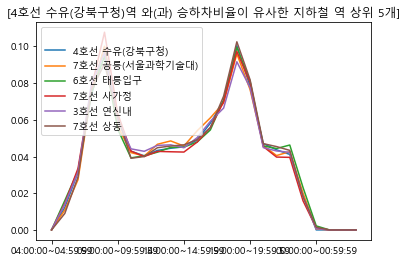

In [5]:
#2번
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv


df = pd.read_csv('C:\\Users\\Song\\Desktop\\subway_time.csv', encoding='UTF-8', index_col=0 ) #파일 불러오기. C:\\Users\\Song\\Desktop\\subway_time.csv는 제가 불러온 파일의 경로입니다.

for i in range(1,len(df.index)): #역에 호선명 추가
    df.iloc[i,0]=df.index[i]+' '+df.iloc[i,0]
    
name = input("특정 호선을 입력하세요 : ") #사용자로부터 데이터 입력받음
a=df.index.str.match(name,na=False ) #nan 값도 False로 처리
temp='선' #모든 호선명에 '선'이라는 단어가 포함되어 있음을 이용
b=df.index.str.contains(temp,na=False ) #전체값
c=df.index.str.contains(temp,na=False )#시간대별 승차+하차 구하기 위한 temp
d=df.index.str.contains(temp,na=False) #전체값
df2=df[a]
df3=df[b]
dftemp=df[c] 
dfall=df[d] 
df2=df2.rename(columns={'지하철역':' '}) #문제 예시와 같게 하기 위해 '지하철역'을 공백처리
df3=df3.rename(columns={'지하철역':' '})
dftemp=dftemp.rename(columns={'지하철역':' '})
dfall=dfall.rename(columns={'지하철역':' '})
df2=df2.set_index(' ') # '지하철역'부분에 index 부여 
df3=df3.set_index(' ')
dftemp=dftemp.set_index(' ')
dfall=dfall.set_index(' ')
df2=df2.apply(pd.to_numeric) #엑셀 내 숫자들이 object 형식으로 구현되어 이를 숫자로 바꿨다. 
df3=df3.apply(pd.to_numeric)
dftemp=dftemp.apply(pd.to_numeric)
dfall=dfall.apply(pd.to_numeric)


allpop=df3.iloc[::].sum(axis=1) #그 역의 전체 유동인구
for i in range(0,48,2):
    dftemp.iloc[::,i]=dftemp.iloc[::,i:i+2].sum(axis=1) #승차 부분을 승차+하차로 설정하고 하차 부분은 사용하지 않을 예정
df4=dftemp.iloc[::,::] #시간대별 승차+하차

for i in range(608):
    for j in range(48):
        dfall.iloc[i,j]=allpop[i] #나누기 위한 작업 : 모든 값을 각각 해당 역의 총 유동인구수로 설정
df4=df4/dfall 
df5=df4.iloc[::,::2] ##승차 부분을 승차+하차로 설정했기 때문에 하차 부분은 사용하지 않음.


mor_on=df2.iloc[::,6:12:2].sum(axis=1) #출근 승차 인원
mor_off=df2.iloc[::,7:12:2].sum(axis=1) #출근 하차 인원
eve_on=df2.iloc[::,26:32:2].sum(axis=1) #퇴근 승차 인원
eve_off=df2.iloc[::,27:32:2].sum(axis=1) #퇴근 하차 인원
poptemp=(mor_on+mor_off+eve_on+eve_off).sort_values()
pop=(mor_on+mor_off+eve_on+eve_off).sort_values().index[:-2:-1] #출퇴근 시간 유동인구가 가장 많은 역

jk=df5.loc[pop]
x=df5.sub(jk.iloc[0], axis=1) #전체 승/하차 비율에서 구한 역(pop)의 승하차 비율을 뺀다.
y=np.power(x,2) #구한 값을 제곱
# 위 작업을 통해 승/하차 비율의 유사도를 얻을 수 있음.
z=y.sum(axis=1).sort_values() 
i=z.sort_values().index[:6] #출퇴근 시간 유동인구가 가장 많은 역 포함하여 6개

plt.rc('font', family='Malgun Gothic')
df5.loc[i].T.plot()
plt.title("["+pop[0]+"역 와(과) 승하차비율이 유사한 지하철 역 상위 5개]")
plt.show() #결과 출력


특정 호선을 입력하세요 : 1호선


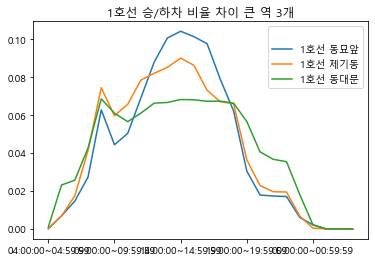

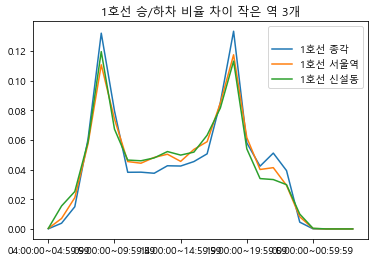

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv


df = pd.read_csv('C:\\Users\\Song\\Desktop\\subway_time.csv', encoding='UTF-8', index_col=0 ) #파일 불러오기. C:\\Users\\Song\\Desktop\\subway_time.csv는 제가 불러온 파일의 경로입니다.
name = input("특정 호선을 입력하세요 : ")
a=df.index.str.match(name,na=False ) #nan 값도 False로 처리
b=df.index.str.match(name,na=False )
c=df.index.str.match(name,na=False )#nan 값도 False로 처리
d=df.index.str.match(name,na=False)
df2=df[a]
df3=df[b]
dftemp=df[c] #시간대별 승차+하차 구하기 위한 temp
dfall=df[d]
df2=df2.rename(columns={'지하철역':' '})
df3=df3.rename(columns={'지하철역':' '})
dftemp=dftemp.rename(columns={'지하철역':' '})
dfall=dfall.rename(columns={'지하철역':' '})
df2=df2.set_index(' ') # '지하철역'에 index 부여 
df3=df3.set_index(' ')
dftemp=dftemp.set_index(' ')# '지하철역'에 index 부여
dfall=dfall.set_index(' ')
df2=df2.apply(pd.to_numeric) #엑셀 내 숫자들이 object 형식으로 구현되어 이를 숫자로 바꿨다. 
df3=df3.apply(pd.to_numeric)
dftemp=dftemp.apply(pd.to_numeric)
dfall=dfall.apply(pd.to_numeric)

allpop=df3.iloc[::].sum(axis=1) #그 역의 전체 유동인구
for i in range(0,48,2):
    dftemp.iloc[::,i]=dftemp.iloc[::,i:i+2].sum(axis=1) #승차 부분을 승차+하차로 설정하고 하차 부분은 사용하지 않을 예정
df4=dftemp.iloc[::,::] #시간대별 승차+하차

for i in range(len(df4.index)): # len(df4.index)=608
    for j in range(48):
        dfall.iloc[i,j]=allpop[i] #나누기 위한 작업 : 모든 값을 각각 해당 역의 총 유동인구수로 설정
df4=df4/dfall
df2=df4.iloc[::,::2]  ##승차 부분을 승차+하차로 설정했기 때문에 하차 부분은 사용하지 않음.

df2=df2.rename(index=lambda x : name+' '+str(x)) #역 이름에 호선명 추가

nor1=df2.iloc[::,:3].sum(axis=1)
nor2=df2.iloc[::,6:13].sum(axis=1)
nor3=df2.iloc[::,16:].sum(axis=1) # 출퇴근시간 제외한 승/하차
work1=df2.iloc[::,3:6].sum(axis=1)
work2=df2.iloc[::,13:16].sum(axis=1) #출퇴근시간 승/하차

pop1=((nor1+nor2+nor3-work1-work2)**2).sort_values().index[:-4:-1] #승하차 비율 차이 큰 역 3개
pop2=((nor1+nor2+nor3-work1-work2)**2).sort_values().index[2::-1] #승하차 비율 차이 작은 역 3개


plt.rc('font', family='Malgun Gothic')
df2.loc[pop1].T.plot()
plt.title(name+" 승/하차 비율 차이 큰 역 3개")
df2.loc[pop2].T.plot()
plt.title(name+" 승/하차 비율 차이 작은 역 3개")
plt.show() #결과 출력